In [1]:
%reset -f

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(123)

In [3]:
### import data
full = pd.read_csv('property_listings.csv')

In [4]:
### view number of rows and columns
full.shape

(9600, 8)

In [5]:
### check variable types
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9600 entries, 0 to 9599
Data columns (total 8 columns):
address      9600 non-null object
rooms        9600 non-null object
year         9475 non-null float64
price        9600 non-null object
bedrooms     9600 non-null object
bathrooms    9600 non-null object
price_psf    9600 non-null object
sqf_list     9600 non-null object
dtypes: float64(1), object(7)
memory usage: 600.1+ KB


In [6]:
### view first 5 obs
full.head()

,address,rooms,year,price,bedrooms,bathrooms,price_psf,sqf_list
0,473 Segar Road,HDB 3 Rooms,2003.0,"$390,000",3,2,$329.39 psf,"1,184 sqft"
1,421 Serangoon Central,HDB 3 Rooms,1989.0,"$650,000",3,2,$580.88 psf,"1,119 sqft"
2,113 Jurong East Street 13,HDB 4 Rooms,1981.0,"$438,000",3,2,$452.48 psf,968 sqft
3,823 Jurong West Street 81,HDB 5 Rooms,1990.0,"$378,000",4,2,$290.32 psf,"1,302 sqft"
4,638 Choa Chu Kang Street 64,HDB 4 Rooms,1998.0,"$450,000",3,2,$418.22 psf,"1,076 sqft"


In [7]:
### view value counts of some variables
for i in ['rooms','bedrooms','bathrooms']:
    print(full[i].value_counts())
    print('-'*30)

HDB 4 Rooms      3050
HDB 3 Rooms      2873
HDB 5 Rooms      2181
HDB Executive     913
HDB 2 Rooms       424
HDB               136
Jumbo HDB          23
Name: rooms, dtype: int64
------------------------------
3          5907
2          2380
4          1084
1           136
5            70
6            18
7             4
unknown       1
Name: bedrooms, dtype: int64
------------------------------
2          7697
1           742
unknown     608
3           498
4            52
5             3
Name: bathrooms, dtype: int64
------------------------------


In [8]:
### get rid of unwanted variables
full2 = full.copy()
del full2['address']

In [9]:
### get rid of observations with missing values
for col in full2.columns:
    if col!='year':
        full2 = full2[full2[col]!='unknown']

full2.dropna(inplace=True)

print(full2.shape)

(8868, 7)


In [10]:
### clean some of the variables
for col in ['price','price_psf','sqf_list']:
    full2[col] = full2[col].apply(lambda x: ''.join(i for i in x if i.isdigit() or i=='.'))

In [11]:
### convert some variables to int
for col in ['year','price','bedrooms','bathrooms','sqf_list']:
    full2[col] = full2[col].astype(int)

### convert price per square foot to float
full2['price_psf'] = full2['price_psf'].astype(float)

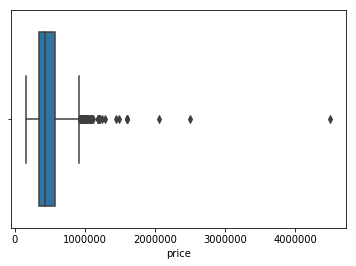

In [12]:
### check for outliers in price
sns.boxplot(full2['price'])

### get rid of extreme outliers (more than 2 million)
full2 = full2[full2['price'] < 2000000]

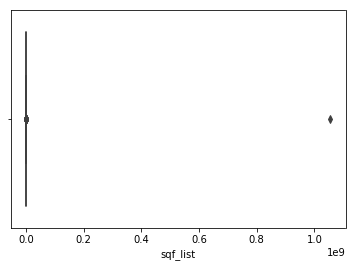

In [13]:
### check for outliers in area (square feet)
sns.boxplot(full2['sqf_list'])

### get rid of extreme outliers (more than 7000)
full2 = full2[full2['sqf_list'] < 7000]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


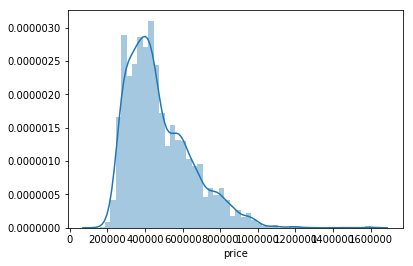

In [14]:
# plot the distribution of prices
sns.distplot(full2['price'])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[]

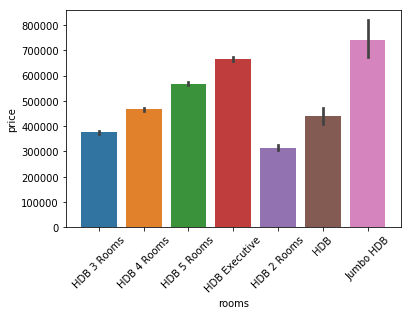

In [15]:
# plot the mean price, by hdb type
sns.barplot(x='rooms', y='price', data=full2)
plt.xticks(rotation=45)
plt.plot()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


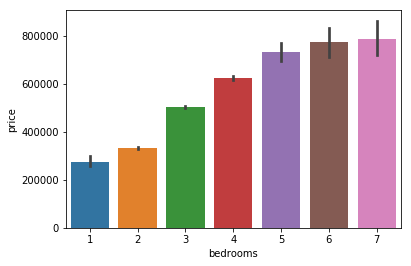

In [16]:
# plot the mean price, by number of bedrooms
sns.barplot(x='bedrooms', y='price', data=full2)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


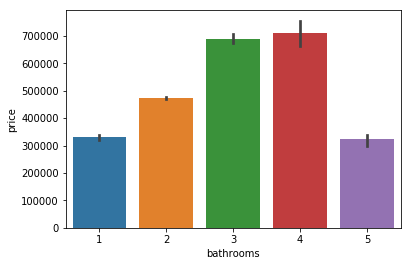

In [17]:
# plot the mean price, by number of bathrooms
sns.barplot(x='bathrooms', y='price', data=full2)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[]

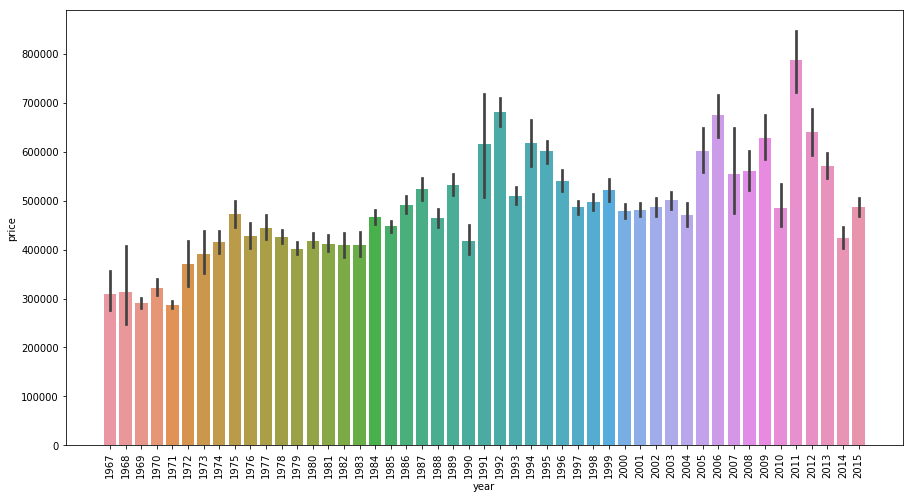

In [18]:
# plot the mean price, by year
plt.figure(figsize=(15,8))

sns.barplot(x='year', y='price', data=full2)
plt.xticks(rotation=90)
plt.plot()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


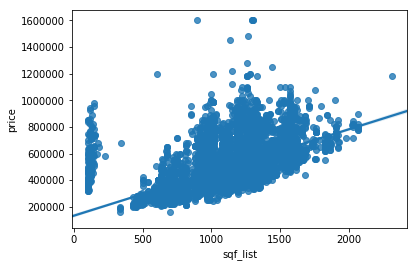

In [19]:
# plot price against square feet
sns.regplot(x='sqf_list', y='price', data=full2)

In [20]:
### one-hot encoding
full2 = pd.get_dummies(full2)

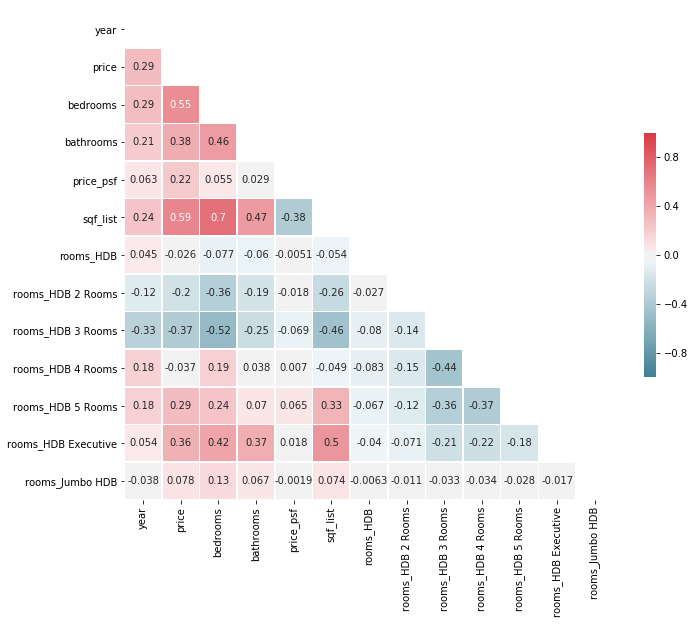

In [21]:
### plot correlation matrix

# Compute the correlation matrix
corr = full2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, center=0, vmin=-1, vmax=1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [22]:
### take log of price
log_price = np.log(full2['price'])

In [23]:
### split into training and test sets
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(full2.drop(columns=['price', 'price_psf']), log_price, test_size=0.2)

In [24]:
### predictive modelling
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

rfr.fit(xtrain, ytrain)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [25]:
### evaluate model
predicted_price = pd.Series(np.exp(rfr.predict(xtest)))
actual_price = np.exp(ytest.reset_index(drop=True))

rmse = np.sqrt(np.mean((predicted_price - actual_price)**2))
mape = np.mean(np.abs((predicted_price - actual_price) / actual_price))

print('RMSE on the test set is:', rmse)
print('MAPE on the test set is:', mape)

RMSE on the test set is: 107743.96882411768
MAPE on the test set is: 0.13738452664925044


In [26]:
### compare against baseline predictions (i.e. always predict the mean price from the training set)
predicted_price = np.mean(np.exp(ytrain))

rmse = np.sqrt(np.mean((predicted_price - actual_price)**2))
mape = np.mean(np.abs((predicted_price - actual_price) / actual_price))

print('RMSE on the test set is:', rmse)
print('MAPE on the test set is:', mape)

RMSE on the test set is: 171350.04360398382
MAPE on the test set is: 0.3144699031413445
